In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx
from pyvis.network import Network
import random

# 폰트 관련

In [3]:
import os
from matplotlib import font_manager as fm

font_file = "../fonts/NanumGothic/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

# 데이터 속에 있는 행정동코드 변환해서 그래프형식으로 뽑아보기

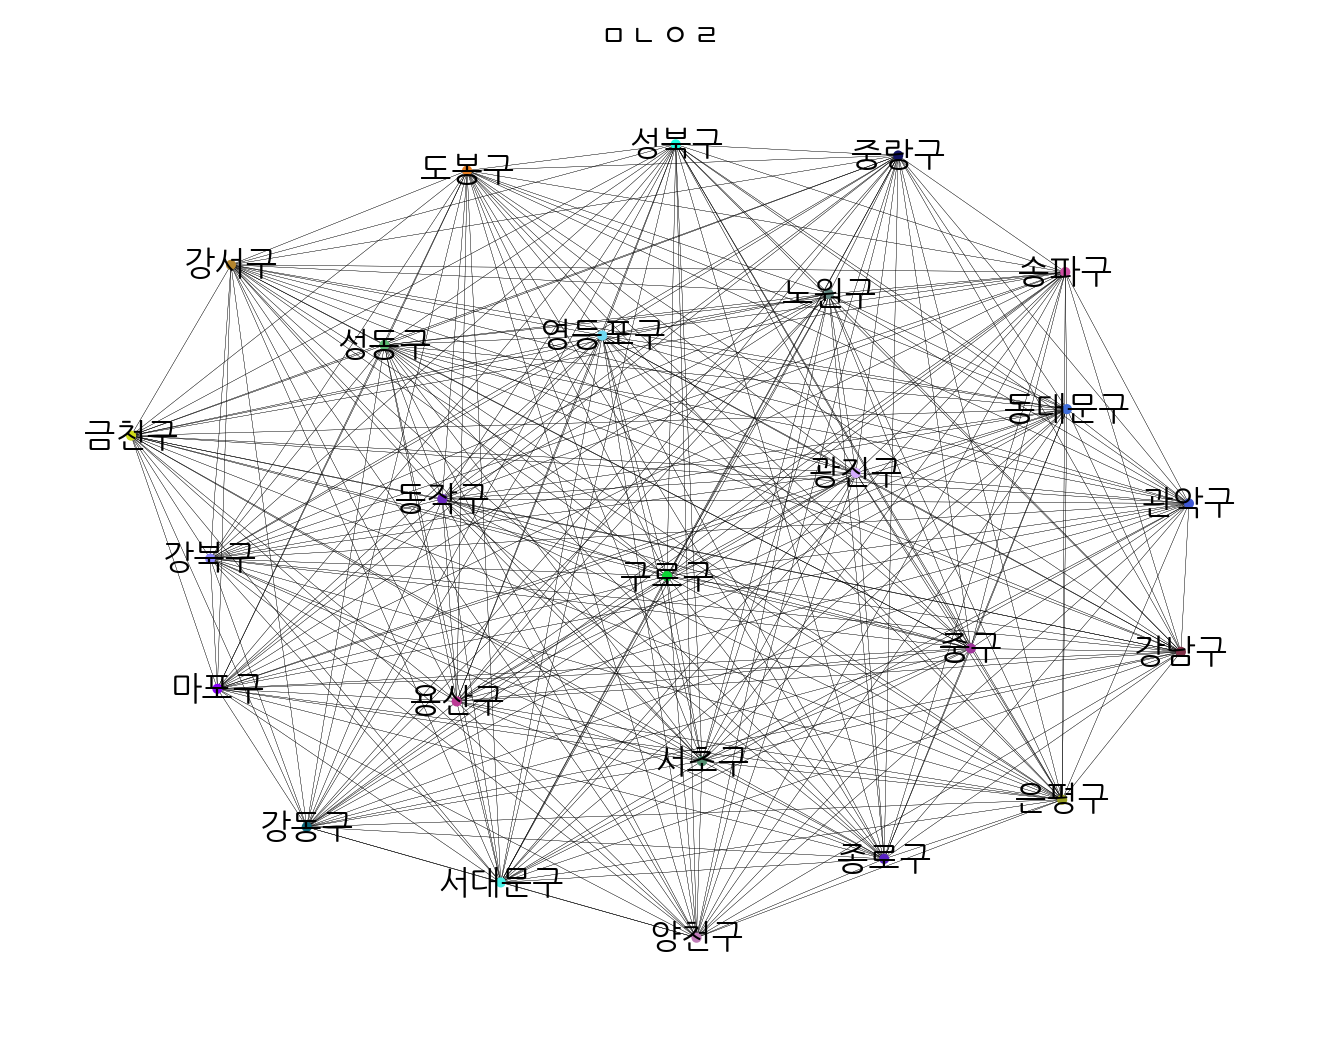

In [4]:
with open("../datasets/한국행정구역분류_행정동코드(서울).csv",
          encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류','읍면동']]

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

an = data['도착 시군구 코드']
an = an.drop_duplicates()
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")
nx.draw(graph,
        with_labels=True,
        node_color=color,
        node_size=7,
        arrows=False,
        width=0.1,
        font_family='NanumGothic',
        pos=nx.spring_layout(graph))

plt.title("ㅁㄴㅇㄹ")
plt.axis('off')
plt.show()

# 이미지 뭉탱이 만들기

In [4]:
from os import listdir


with open("../datasets/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]

onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]

for filename in sorted(onlyfiles):
    with open("../large-datasets/생활이동_자치구_202209/"+filename, encoding='cp949') as f:
        data = pd.read_csv(f)

    data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
    data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

    tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

    data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
    data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
    data = data.replace(tst)

    graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())
    nx.draw(graph,
            with_labels=True,
            node_color=color,
            node_size=7,
            arrows=False,
            width=0.1,
            font_family='NanumGothic',
            pos=nx.spring_layout(graph))

    plt.title(filename)
    plt.axis('off')
    plt.savefig("../results/forgif/" + filename + ".png", dpi=96)
    plt.close()

```
forgif/
├── 생활이동_자치구_2022.09_00시.csv.png
├── 생활이동_자치구_2022.09_01시.csv.png
├── 생활이동_자치구_2022.09_02시.csv.png
├── 생활이동_자치구_2022.09_03시.csv.png
├── 생활이동_자치구_2022.09_04시.csv.png
├── 생활이동_자치구_2022.09_05시.csv.png
├── 생활이동_자치구_2022.09_06시.csv.png
├── 생활이동_자치구_2022.09_07시.csv.png
├── 생활이동_자치구_2022.09_08시.csv.png
├── 생활이동_자치구_2022.09_09시.csv.png
├── 생활이동_자치구_2022.09_10시.csv.png
├── 생활이동_자치구_2022.09_11시.csv.png
├── 생활이동_자치구_2022.09_12시.csv.png
├── 생활이동_자치구_2022.09_13시.csv.png
├── 생활이동_자치구_2022.09_14시.csv.png
├── 생활이동_자치구_2022.09_15시.csv.png
├── 생활이동_자치구_2022.09_16시.csv.png
├── 생활이동_자치구_2022.09_17시.csv.png
├── 생활이동_자치구_2022.09_18시.csv.png
├── 생활이동_자치구_2022.09_19시.csv.png
├── 생활이동_자치구_2022.09_20시.csv.png
├── 생활이동_자치구_2022.09_21시.csv.png
├── 생활이동_자치구_2022.09_22시.csv.png
└── 생활이동_자치구_2022.09_23시.csv.png
```

# GIF 만들기

In [5]:
import imageio.v2 as imageio
from os import listdir

filenames = ["../results/forgif/"+f for f in listdir("../results/forgif/")]
frames = [imageio.imread(i) for i in filenames]
imageio.mimsave('../results/result.gif', frames, format='GIF', duration=1.5)

![aaaa](../results/result.gif)